In [101]:
%matplotlib
import sys
sys.path.append('/home/james/Code/globalai')

import numpy as np
import numpy.lib.recfunctions
import matplotlib.pyplot as plt

from common.logging import log_reader
from common.logging.log_reader import load


Using matplotlib backend: Qt5Agg


data = load("/tmp/ImuModel/integrateRandomImu.log", True)

print(data.dtype)



['w', 'x', 'y', 'z']


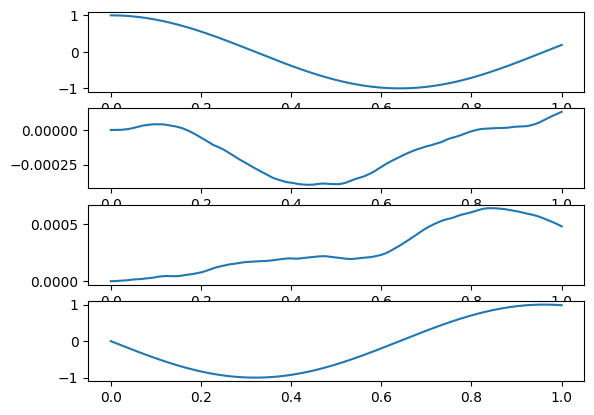

In [102]:
def bottom_field(data, keys):
    if type(keys) is list or type(keys) is tuple:
        field = data
        for key in keys:
            if type(key) is list or type(key) is tuple:
                print([k for k in key])
                field = np.vstack([field[k] for k in key]).T
            else:
                field = field[key]
    else:
        field = data[keys]
    if len(field.shape) > 2:
        field = field[:,:,0]
    return field

def standard_plot(name, data, y_key, x_key="t"):
    xfield = bottom_field(data, x_key)
    yfield = bottom_field(data, y_key)
    num_plots = yfield.shape[1]

    f = plt.figure()
    plt.suptitle(name)
    for i in range(num_plots):
        plt.suptitle
        plt.subplot(num_plots, 1, i+1)
        plt.plot(xfield, yfield[:,i])
    return f

standard_plot("translation", data, ['x','x','trans'])
standard_plot("rotation", data, ['x','x','rot', ['w','x','y','z']])




In [35]:
f = plt.figure()
plt.suptitle("Position")
ax = None
for i in range(3):
    plt.subplot(3,1,i+1, sharex = ax)
    plt.plot(data['t'], data['x']['x']['trans'][:,i])
 

In [36]:
f = plt.figure()
plt.suptitle("Rotation")
ax = None
for i, key in enumerate(['w','x','y','z']):
    plt.subplot(4,1,i+1, sharex = ax)
    plt.plot(data['t'], data['x']['x']['rot'][key])
    plt.ylabel(key)

In [37]:
f = plt.figure()
plt.suptitle("Velocity")
ax = None
for i in range(3):
    plt.subplot(3,1,i+1, sharex = ax)
    plt.plot(data['t'], data['x']['dx']['linear'][:,i])


In [38]:
f = plt.figure()
plt.suptitle("Omega")
ax = None
for i in range(3):
    plt.subplot(3,1,i+1, sharex = ax)
    plt.plot(data['t'], data['x']['dx']['angular'][:,i])